In [ ]:
from pyrplidar import PyRPlidar

In [ ]:
lidar=PyRPlidar()

lidar.connect(port='/dev/ttyUSB1',baudrate=460800)

In [ ]:
print(lidar.get_health())

In [ ]:
lidar.start_scan_express(0)

In [ ]:
from rplidar import RPLidar

In [ ]:
lidar=RPLidar(port='/dev/ttyUSB1')

In [ ]:
lidar.baudrate=460800

In [ ]:
lidar.connect()

In [ ]:
lidar.get_health()

In [ ]:
lidar.get_info()

In [ ]:
lidar.set_pwm(200)

In [ ]:
for i in range(0,10):
    scan=lidar.iter_measurments()
    print(scan)

In [ ]:
import sys

In [77]:
import subprocess


In [78]:
command='timeout 5 rplidar_ultra_simple --channel --serial /dev/ttyUSB1 460800 >scan_result'


In [79]:
subprocess.run(command,shell=True)

CompletedProcess(args='timeout 5 rplidar_ultra_simple --channel --serial /dev/ttyUSB1 460800 >scan_result', returncode=124)

In [93]:
file=open("/home/k/ROS/rplidar_sdk-master/output/Linux/Release/output","r")

In [81]:
from matplotlib import pyplot as plt

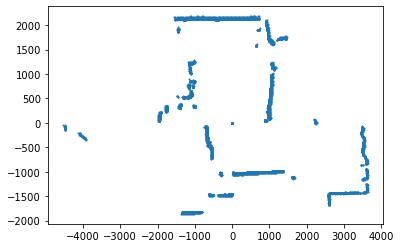

In [104]:
file=open("/home/k/ROS/rplidar_sdk-master/output/Linux/Release/output","r")

list_data=[]
arr=[]
for line in file.readlines():
    if(line[0] == ' '):
        line=line.strip()
        arr=line.split(' ')
        if(len(arr)==6):
            d={}
            d[arr[0]]=arr[1]
            d[arr[2]]=arr[3]
            d[arr[4]]=arr[5]
            list_data.append(d)
file.close()

x=pd.DataFrame(list_data)
x['theta:']=x['theta:'].astype(float)
x['Dist:'] = x['Dist:'].astype(float)
x['Q:']=x['Q:'].astype(int)

l=[]
for i in x.iterrows():
    d={}
    theta=i[1]['theta:']
    dist=i[1]['Dist:']
    d['xcoord']=math.cos(math.radians(theta))*dist
    d['ycoord']=math.sin(math.radians(theta))*dist
    l.append(d)
    
y=pd.DataFrame(l)

final=pd.concat([x,y],axis=1)

plt.scatter(final['xcoord'],final['ycoord'],s=1)

In [83]:
import pandas as pd

In [84]:
import math


In [96]:
t=0.47
d=306

xcoord=math.cos(math.radians(t))*d
ycoord=math.sin(math.radians(t))*d

In [97]:
(xcoord,ycoord)

(305.9897046895624, 2.51010437918164)

In [100]:
y

,xcoord,ycoord
0,1458.835650,21.898522
1,1473.553688,36.270215
2,1488.119946,51.186180
3,1499.559931,65.734424
4,1511.813007,81.347606
...,...,...
12490,0.000000,-0.000000
12491,603.681506,-647.142673
12492,611.430934,-639.825924
12493,622.700373,-635.880685


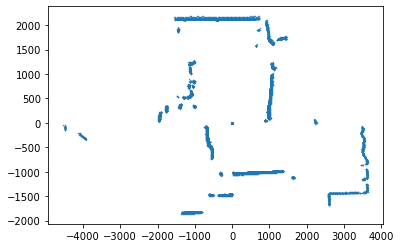

In [106]:
plt.scatter(final['xcoord'],final['ycoord'],s=.2)